<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/Copy_of_Final_Compiled_GSS_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSS Midterm Project: Factors Affecting Capital Punishment Perception

Kiera Murphy, Connor Overbay, Alison Kerber, Annika Richardson, Taylor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Summary:

The question that we chose to focus on for the project was the topic of which demographics are highly likely to favor the death penalty. We found this topic to be uniquely interesting because it is a binary categorical variable but there are so many other factors that are present in the data set that are likely to have a strong impact on it. We decided to leverage the method of turning the capital punishment variable into a binary one where “1” represents an individual being in favor of capital punishment and a “0” represents an opposition to it. We then were able to conduct various forms of correlation analyses, and visualizations in the form of bar graphs and histograms that are further expanded upon below. Ultimately, as you will soon be able to see, the results of our analysis clarified that……[results]

##Data:

Data for this study comes from the General Social Survey (GSS), a survey that is carried out through interviews with a cross-section of the US population. The interviews have taken place since 1972 and the organization conducting the survey has kept the methodology consistent over the duration of testing. Questions that remain on the interview are asked in the same manner every year as to not influence results and questions that are newly added are not asked retrospectively to past interviewees. This is a likely source of some null entries seen in the data set, as the question that we are using as a dependent variable was a more recent question. Removing the null values in this situation is valid, as the missing values were missing simply because there was not an opportunity to answer. Also, since we are not comparing change over time in this study, eliminating all early entries before the question appeared on the survey does not affect the results, and is essential for our analysis. Here are the relevant variables that we will be analyzing:

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/abkerper/project_gss/main/cleaned_data.csv')
df.head()

,cappun,relig,age_category,polviews
0,NaN,christianity,3.0,"moderate, middle of the road"
1,favor,none/other,1.0,slightly liberal
2,favor,catholic,3.0,slightly conservative
3,NaN,protestant,1.0,liberal
4,oppose,catholic,1.0,slightly conservative


**Cappun:**
Our dependent variable measures whether individuals in the GSS favor or oppose the death penalty. The specific question asked in the survey was: “Do you favor or oppose the death penalty for persons convicted of murder?” Values containing missing data were changed to “nan.”


In [7]:
df['cappun'].describe()

count     21938
unique        2
top       favor
freq      13729
Name: cappun, dtype: object

**Age:**
Each individual who took the survey entered their age. We cleaned the age variable so that it is grouped into individuals ages 18-29, 30-39, 40-49, 50-64, and 65-89. We chose these age clusters because they were given in the GSS Codebook. All the zero values for age were replaced with “nan.”


In [8]:
df['age_category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 24130 entries, 0 to 24129
Series name: age_category
Non-Null Count  Dtype  
--------------  -----  
23539 non-null  float64
dtypes: float64(1)
memory usage: 188.6 KB


**Relig:**
Individuals were asked about their religious preference: “What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?” The variable takes the values protestant, catholic,  jewish, christian,  buddhist, muslim/islam, hindu, native american, or none/other. Values containing missing data were changed to “nan.

In [9]:
df['relig'].describe()

count          23883
unique             9
top       protestant
freq           11173
Name: relig, dtype: object

**Polviews:**
Individuals were asked “We hear a lot of talk these days about liberals and conservatives. I'm going to show you a seven-point scale on which the political views that people might hold are arranged from extremely liberal--point 1--to extremely conservative--point 7. Where would you place yourself on this scale?” The variable takes the values extremely conservative, conservative,  slightly conservative, moderate, slightly liberal, liberal, and extremely liberal. Values containing missing data were changed to “nan.”

In [10]:
df['polviews'].describe()

count                            23262
unique                               7
top       moderate, middle of the road
freq                              8713
Name: polviews, dtype: object

##Results:

Text(0.5, 1.0, 'Religion and Capital Punishment Opinion')

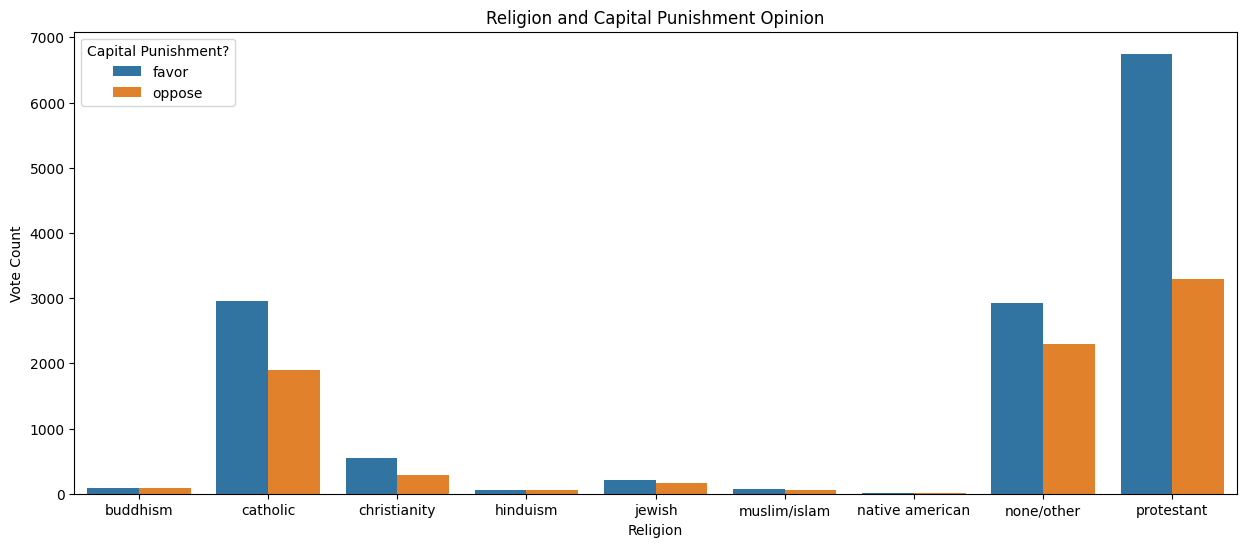

In [11]:
data_from_groupby = {'religion': ['buddhism', 'buddhism' , 'catholic', 'catholic', 'christianity', 'christianity', 'hinduism' ,'hinduism',
                                  'jewish', 'jewish', 'muslim/islam', 'muslim/islam', 'native american', 'native american' , 'none/other' , 'none/other', 'protestant' , 'protestant'],
    'Capital Punishment?': ['favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose',],
    'count': [94, 88, 2956, 1893, 541, 292, 55, 53, 203, 157, 69, 57, 13, 9, 2930, 2294, 6749, 3286]
}
df = pd.DataFrame(data_from_groupby)

plt.figure(figsize=(15, 6))
sns.barplot(x='religion', y='count', hue='Capital Punishment?', data=df)
plt.xlabel('Religion')
plt.ylabel('Vote Count')
plt.title('Religion and Capital Punishment Opinion')